In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def signal_model(x):
    return 1.5*np.exp(-1*x)

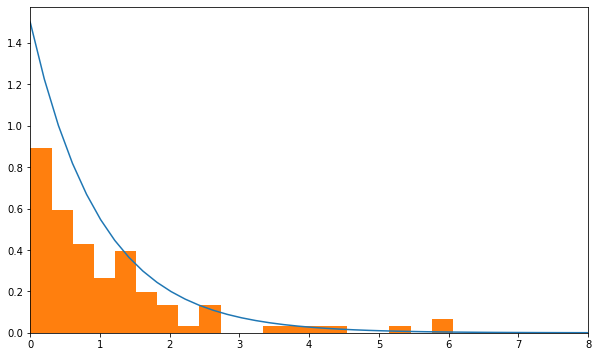

In [4]:
plt.figure(figsize=(10,6))
x = np.linspace(0, 20, 100)
plt.plot(x, signal_model(x) )
di = np.random.exponential(1,100)
value, bins, _ = plt.hist(di, bins = 20, density = True)
# for b in bins:
#     plt.vlines(b, 0, 2, alpha = 0.2, color ='black')
binscenter=(bins[:-1]+bins[1:])*0.5
plt.xlim(0,8)
plt.show()

In [5]:
i, maxgaps = 0, []
for b in range(20):
    if i < 20 and value[i] ==0:
        for n in range(5):
            if value[i+n] !=0: 
                gaparea = np.trapz([signal_model(bins[i]), signal_model(bins[i+n])], [bins[i], bins[i+n]])
                maxgaps.append((i, i+n , gaparea))
                i+=n; 
                break
    else:
        i+=1
maxgaps.append((bins[-1], 8, np.trapz([signal_model(bins[-1]), signal_model(8)], [bins[-1], 8])))
maxarray = np.asarray(maxgaps)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
print('maximum area ', maxvalues[2], 'is between', bins[int(maxvalues[0])], 'and', bins[int(maxvalues[1])])

maximum area  0.045846457963809165 is between 2.7287480989331527 and 3.3343490241433686
